# POKER GAME ANALYSIS

### Below is an analysis of some aspects of the poker game. The original data was downloaded from the Kaggle platform and then cleaned and transformed into minor datasets by Python. Original data contained a over a milion records of random poker configurations. I wrote a python script that took those configurations, created a specified amount of players participating in a game and simulating a game between those players in for a specified amount of rounds. Then it generated 2 csv files with the results of each game considerating every player, statistics for each card configuration, such as number wins and looses for a certain configurations, probability for a win and lose having a certain configuration and number of it's occourances. In the analysis below i used results for games that were played by 2 to 10 players and every simulation consisted of 50000 rounds for the fairness o results. Hope you'll enjoy the analysis and maybe learn something useful.

## PART 1 - Analysis of average odds of winning for each player

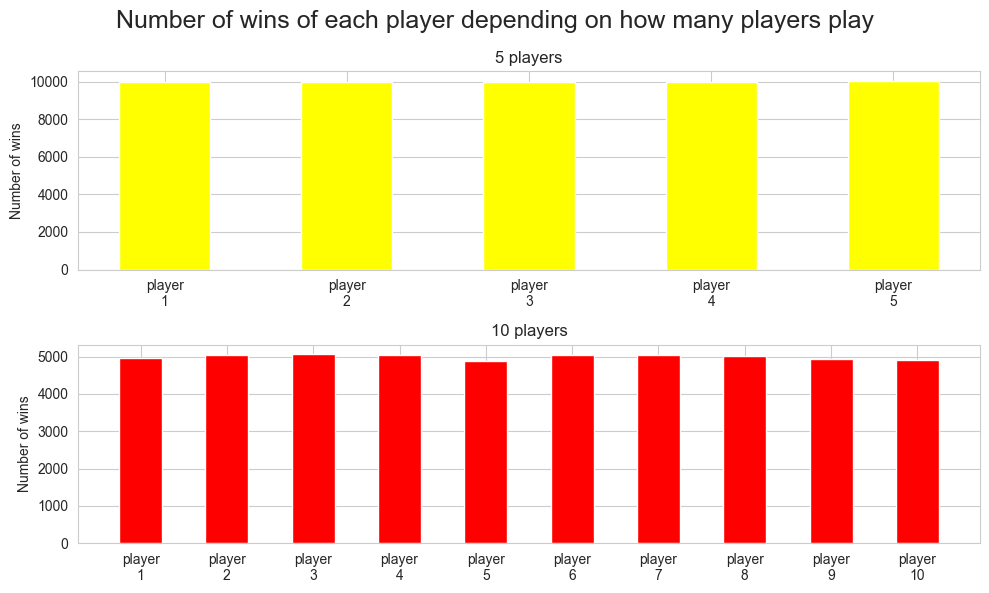

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

for i,x in enumerate([5,10]):
    colors = ['yellow','red']
    plt.subplot(2,1,i+1)
    with open(f"example_results\\{x}_players_players.csv") as data:
        sns.set_style("whitegrid")
        data = pd.DataFrame(pd.read_csv(data))
        players = np.array([f'player\n{n}' for n in range(1,len(data)+1)])
        plt.bar(players,data["Number of wins"], color=colors[i], width=0.5)
        plt.ylabel("Number of wins")
        plt.title(f"{x} players")

plt.suptitle("Number of wins of each player depending on how many players play",fontsize=18)
plt.tight_layout()

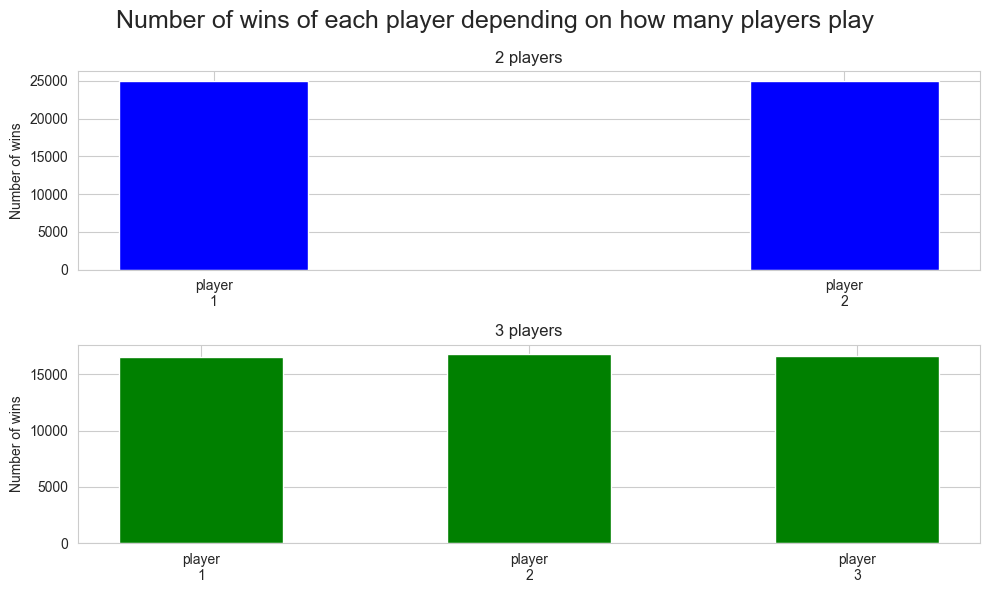

In [79]:
plt.figure(figsize=(10, 6))
for i,x in enumerate([2,3]):
    colors = ['blue','green']
    plt.subplot(2,1,i+1)
    with open(f"example_results\\{x}_players_players.csv") as data:
        if i == 0:
            wdt = 0.3
        else:
            wdt = 0.5
        sns.set_style("whitegrid")
        data = pd.DataFrame(pd.read_csv(data))
        players = np.array([f'player\n{n}' for n in range(1,len(data)+1)])
        
        plt.bar(players,data["Number of wins"], color=colors[i], width=wdt)
        plt.ylabel("Number of wins")
        plt.title(f"{x} players")

plt.suptitle("Number of wins of each player depending on how many players play",fontsize=18)
plt.tight_layout()

#### From the charts it is easy to conclude that no matter how many players participate in the game, the chance of winning for everyone is about the same. 

### PART 2 - How likely is to get a certain hand configuration

#### In this part we will determine what are the chances of getting a certain configuration. But first let's think about something diffrent.<br>Can number of players participating in a game affect chances of getting any configuration? For that purpose, lets analyze pie chart representing number of hand configuration occourances in a 2 player game and a 10 player game

<Figure size 640x480 with 0 Axes>

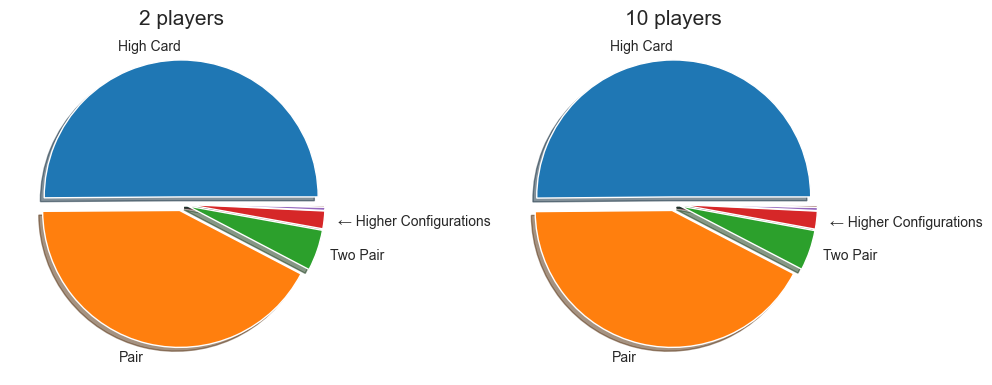

In [82]:
number_of_players_in_game = [2,10]
configuration_names = [
    'High Card',
    'Pair',
    'Two Pair',
    '← Higher Configurations',
    '',
    '',
    '',
    '',
    '',
    ''
]

### GETTING OCCOURANCES OF ANY HAND ###

occourances_of_hands = []
for player_count in number_of_players_in_game:
    with open("example_results\\" + str(player_count) + "_players_hands.csv",'r') as data:
        data = pd.DataFrame(pd.read_csv(data))
        occourances = []
        for configuration_number in range(len(configuration_names)):
            occourances.append(int(data["Number of hands played"].loc[configuration_number]))
        occourances_of_hands.append(occourances)
### CREATING PLOTS ###

plt.suptitle("Occourances of each hand configuration in 2 and 10 player games",fontsize=18, y=0.95)
plt.figure(figsize=(10, 6))
for plot_number in range(2):
    plt.subplot(1,2,plot_number+1)
    plt.pie(occourances_of_hands[plot_number],labels = configuration_names, shadow=True, explode=[0.05 for _ in range(len(configuration_names))])
    plt.title(f'{number_of_players_in_game[plot_number]} players',fontsize=15)
    plt.tight_layout()
    sns.set_style("whitegrid")
plt.subplots_adjust(top=1.05)


#### As we can see above, both charts look almost exacly the same.<br>Only the most common configurations are visible such as Extreme cases were taken into account, one where the number of players is the smallest and the largest so we can conclude that the distribution of specific card configurations does not change with the change in the number of players.<br>It is also worth mentioning that card configurations higher than 'Two Pair' are barely visible on the chart. This means that they are much rarer than the three basic configurations.<br> Those charts also prove that the chances of getting a certain configuration isn't affected by the number of players participating in a game

### PART 3 - Analysis of rare poker configurations

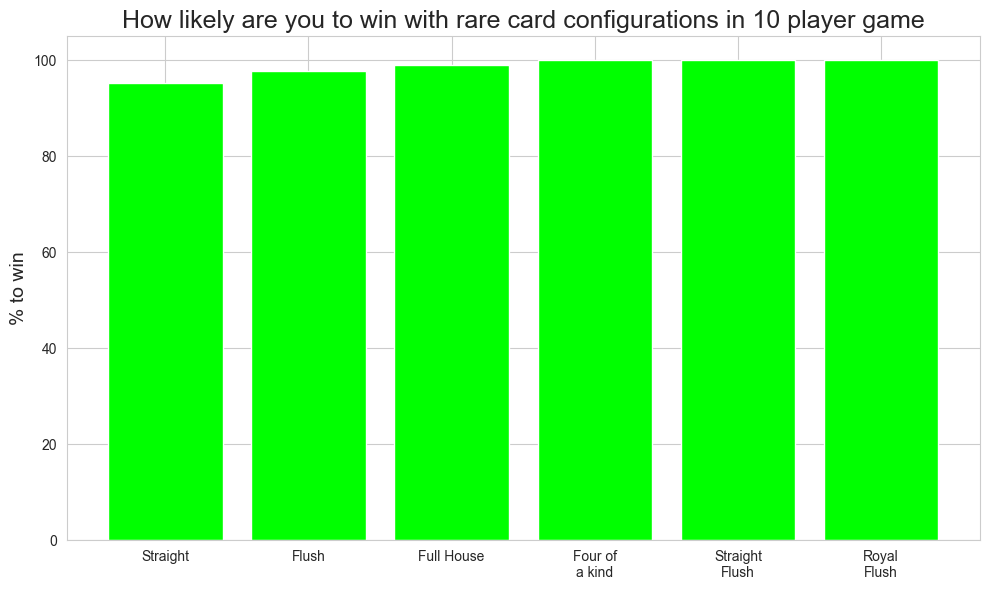

In [ ]:
with open(r"example_results\10_players_hands.csv") as data:
    data = pd.DataFrame(pd.read_csv(data))
    data = (data[["Hand Name", "Hand win percent"]]).loc[4:9]
    
    sns.set_style("whitegrid")
    xaxis = ["Straight", "Flush", "Full House", "Four of\na kind", "Straight\nFlush", "Royal\nFlush"]
    yaxis = [float(n[0:(len(n)-1)]) for n in data["Hand win percent"]]
    plt.figure(figsize=(10, 6))
    plt.bar(xaxis,yaxis, color = "lime")
    plt.title("How likely are you to win with rare card configurations in 10 player game",fontsize=18)
    plt.ylabel("Chance to win (%)",fontsize=14)
    
    plt.tight_layout()

#### Even in the case of doing a simulation with the largest possible number of players in a single poker game, we can see that by having a hand configuratio higher than “Three of a Kind”, the chances of winning with such configuration aren't less than 95 percent.<br>So if you're playing with any number of people and have one of these configurations, it pays out to bet high while keeping a poker face so that other players don't see through your tactics.

#### To better visualize that the number of players does not affect high-ranking poker plays, we can compare the odds of winning the weakest of the configurations shown above together with a lower-ranking configuration whose odds change as the number of players changes.<br>So we will compare “Straight” with “Two Pair”

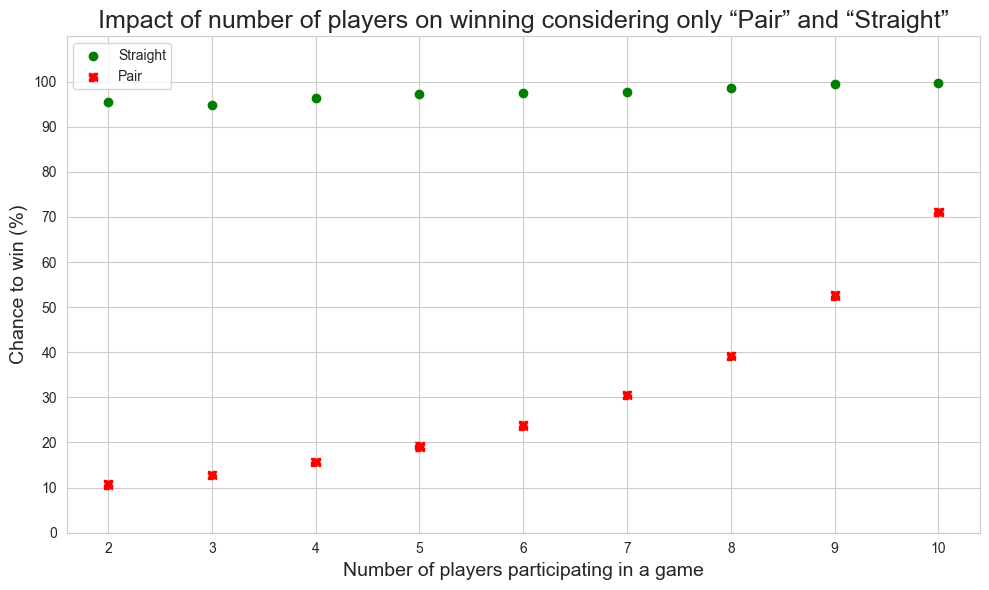

In [96]:
number_of_players_in_game = [i for i in range(2,11)][::-1]
pair_chances = []
straight_chances = []
for player_count in number_of_players_in_game:
    filename = r"example_results\\" + str(player_count) + "_players_hands.csv"
    
    ### WCZYTYWANIE SZANS DLA PARY I STRAIGHTA W ZALEZNOSCI OD ILOSCI GRACZY ###
    
    with open(filename,'r') as data:
        data = pd.DataFrame(pd.read_csv(data))
        

        pair_chance = data["Hand win percent"].loc[1]
        pair_chance = float(pair_chance[0:len(pair_chance)-1])
        straight_chance = data["Hand win percent"].loc[4]
        straight_chance = float(straight_chance[0:len(straight_chance)-1])
        
    pair_chances.append(pair_chance)
    straight_chances.append(straight_chance)

number_of_players_in_game = number_of_players_in_game[::-1]

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
plt.scatter(number_of_players_in_game,straight_chances,marker="o", linestyle="-", label="Straight", color="green")
plt.scatter(number_of_players_in_game,pair_chances,marker="s", linestyle="--", label="Pair", color="red")
plt.legend()
plt.xlabel("Number of players participating in a game",fontsize=14)
plt.ylabel("Chance to win (%)",fontsize=14)
plt.ylim(0,110)
plt.title("Impact of number of players on winning considering only “Pair” and “Straight”",fontsize=18)
plt.yticks(np.arange(0, 110, 10))
plt.tight_layout()

#### As we can see in the graph above, Chances of winning while having a 'Straight' are pretty stable at around 95% to almost 100% to win a game and are only getting around 5% of a rise from 2 to 10 players, so any card configuration higher will have a simmilar probabilities with even less change visible. On the other hand chances of winning with a common configuration like a 'Pair' are much more dependent of the number of players in the game. The chances of winning with it were dropping slightly from

### PART 4 Analysis of common poker configurations

#### If you have a common poker configuration, the chances of winning a round are more varied and depend on the number of players participating in the game
##### Let's analyse chances of winning with a common card configurations in a 2 player match


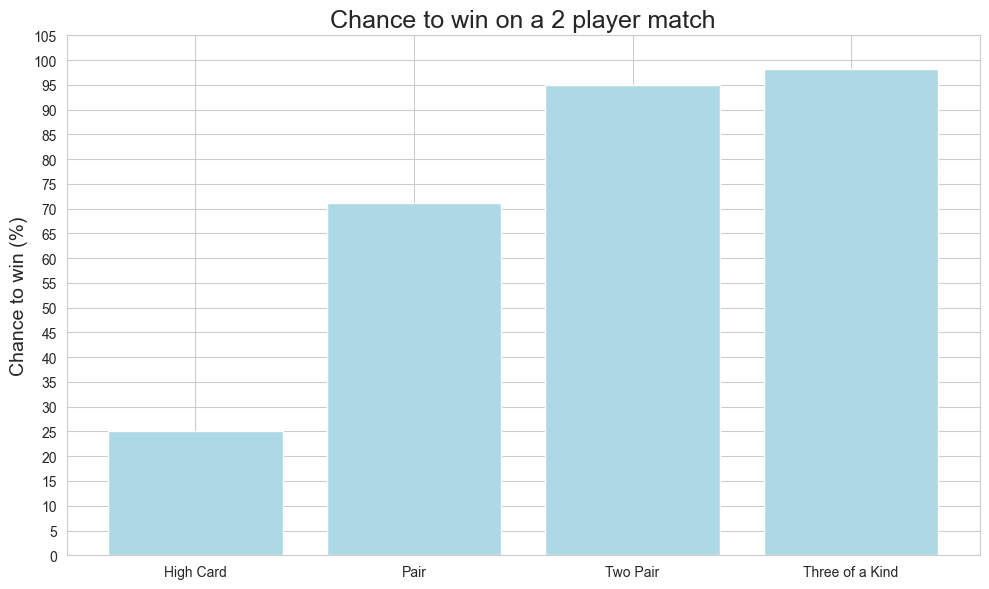

In [95]:
configuration_names = np.array((
    'High Card',
    'Pair',
    'Two Pair',
    'Three of a Kind'
))

with open(r'example_results\2_players_hands.csv','r') as data:
    data = pd.DataFrame(pd.read_csv(data))
    configuration_chances = data["Hand win percent"].loc[0:3]
    temp = np.array(())
    for chance in configuration_chances:
        chance = float(chance[0:len(chance)-2])
        temp = np.append(temp, chance)
    configuration_chances = pd.Series(temp)

plt.figure(figsize=(10, 6))
plt.bar(configuration_names,configuration_chances, color = "lightblue")
plt.title("Chance to win on a 2 player match",fontsize=18)
plt.ylabel("Chance to win (%)",fontsize=14)
plt.yticks(np.arange(0, 110, 5))
plt.tight_layout()
        
        
                

#### On the graph above we can see 4 bars representing 4 most common poker configurations and the chances of winning while having such a configuration.<br>We can see something odd on this graph. The third most common configuration almost guarantees you a win! Besides that, if you have the second most common configuration on a 2 player game you have a little bit more than a 70% chance of wining.<br> In conclusion, most of the time when playing only with one person, its resonable to bet high while having anything other than a high card and if you have something higher than pair that you should bet really high since the chances are all on your side.